# Supply Chain Management
---



A Fast Moving Consumer Goods (FMCG) company entered into the instant noodles business two
years back. Their higher management has noticed that there is a mismatch in the demand and
supply. Where the demand is high, supply is pretty low and vice-versa which results in a loss in
inventory cost and ultimately loss to the company. Hence, the higher management wants to
optimize the supply quantity in each and every warehouse in the entire country.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.style
from warnings import filterwarnings
filterwarnings("ignore")

### Load data







In [ ]:
#training dataset
df_train=pd.read_csv('/content/sample_data/supply_train.csv')
#testing dataset
df_test=pd.read_csv('/content/sample_data/supply_test.csv')
df_train.head()


,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [ ]:
df_test.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071


In [ ]:
df_train.shape


(16620, 25)

In [ ]:
df_test.shape


(5529, 25)

In [ ]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

In [ ]:
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5529 non-null   int64  
 1   Ware_house_ID                 5529 non-null   object 
 2   WH_Manager_ID                 5529 non-null   object 
 3   Location_type                 5529 non-null   object 
 4   WH_capacity_size              5529 non-null   object 
 5   zone                          5529 non-null   object 
 6   WH_regional_zone              5529 non-null   object 
 7   num_refill_req_l3m            5529 non-null   int64  
 8   transport_issue_l1y           5529 non-null   int64  
 9   Competitor_in_mkt             5529 non-null   int64  
 10  retail_shop_num               5529 non-null   int64  
 11  wh_owner_type                 5529 non-null   object 
 12  distributor_num               5529 non-null   int64  
 13  flo

### Data Preprocessing

In [ ]:
df_test=df_train.iloc[:,1:]
df_test.head(5)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [ ]:

df_test=df_test.iloc[:,1:]
df_test.head(5)

,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [ ]:
df_train.describe()


,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,15953.000000,8760.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,8309.500000,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.911490,2009.345320,17.127196,0.306137,3.491095,18.727377,22098.420096
std,4797.925072,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.842046,7.544672,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,4154.750000,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,8309.500000,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,12464.250000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,16619.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [ ]:
# Check for missing values
df_test.isnull().sum()

WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [ ]:
# Replacing missing values with the median
df_train['workers_num'].fillna(df_train['workers_num'].median(), inplace=True)
df_test['workers_num'].fillna(df_test['workers_num'].median(), inplace=True)
# Replacing missing values with the median or mode
df_train['wh_est_year'].fillna(df_train['wh_est_year'].median(), inplace=True)
df_test['wh_est_year'].fillna(df_test['wh_est_year'].median(), inplace=True)
# Filling missing values with a default category or mode
df_train['approved_wh_govt_certificate'].fillna('NIL', inplace=True)
df_test['approved_wh_govt_certificate'].fillna('NIL', inplace=True)
# Check for missing values
df_train.isnull().sum()

Unnamed: 0                      0
Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [ ]:
df_train=df_train.drop(columns=["Unnamed: 0"])
df_train

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,2009.0,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,2009.0,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,2009.0,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,2009.0,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,4779,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,5718,...,1,164,30.0,2009.0,17,0,B+,6,24,21113
16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,4514,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,5829,...,1,119,28.0,2007.0,16,0,A,5,15,21103


# DATA VISULIZATION


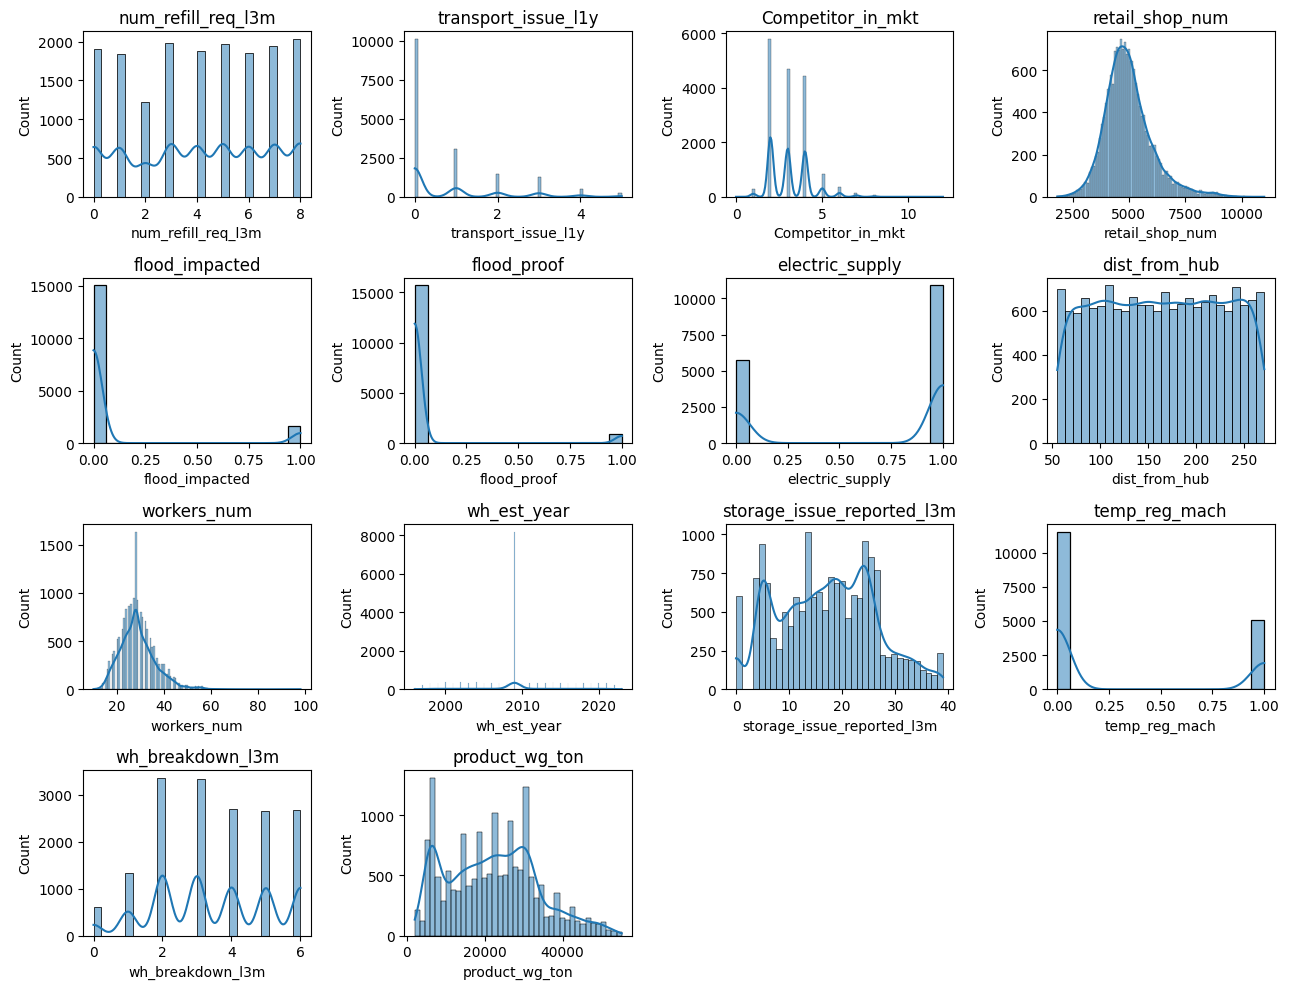

In [ ]:
# Plot histograms for numerical features
numerical_columns = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
                     'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
                     'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'product_wg_ton']

plt.figure(figsize=(13, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df_train[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# FINDINGS:
## num_refill_req_l3m:
Right-skewed distribution with a peak around 8 refill requests. Most warehouses have a moderate level of refill requests, but a few experience significantly higher numbers.


## transport_issue_l1y:
Slightly right-skewed distribution. Most warehouses have a low number of transport issues, but a few have a higher frequency.


## Competitor_in_mkt:
Majority of warehouses face competition from 2 to 3 competitors. Fewer warehouses experience higher levels of competition.


## Retail_shop_num:
Somewhat right-skewed distribution. Most warehouses have a moderate number of retail shops, but some have a higher count.


## dist_from_hub:
Distribution of distances from the warehouse to the production hub is spread out. Peak in the middle range, indicating variation in distances among the warehouses.


## workers_num:
Somewhat normally distributed. Peak around 24 to 28 workers, suggesting many warehouses have a similar number of workers.


## wh_est_year:
Discrete distribution, no specific trend. Warehouses were established over a range of years, reflecting the establishment years of the warehouses.


## product_wg_ton:
Relatively uniform distribution. Warehouses produce noodles with a variety of product weights.



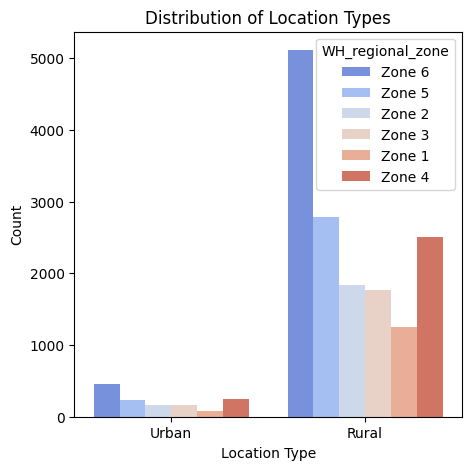

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data=df_train, x='Location_type',hue='WH_regional_zone',palette='coolwarm')
plt.title('Distribution of Location Types')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()

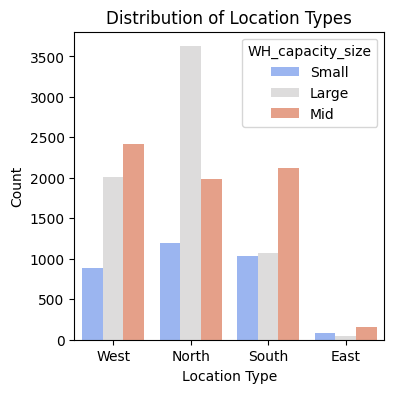

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(data=df_train, x='zone',hue='WH_capacity_size',palette='coolwarm')
plt.title('Distribution of Location Types')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()

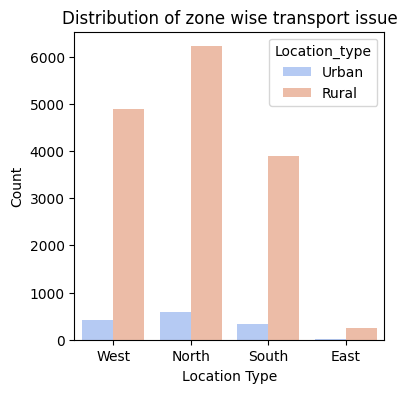

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(data=df_train, x='zone',hue='Location_type',palette='coolwarm')
plt.title('Distribution of zone wise transport issue')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()

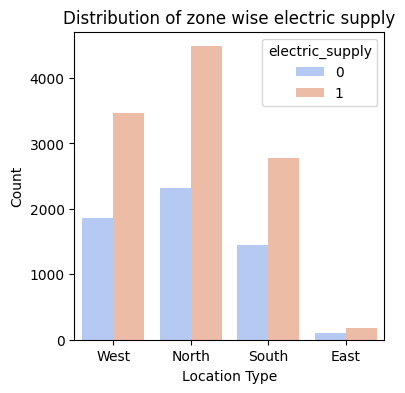

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(data=df_train, x='zone',hue='electric_supply',palette='coolwarm')
plt.title('Distribution of zone wise electric supply')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()

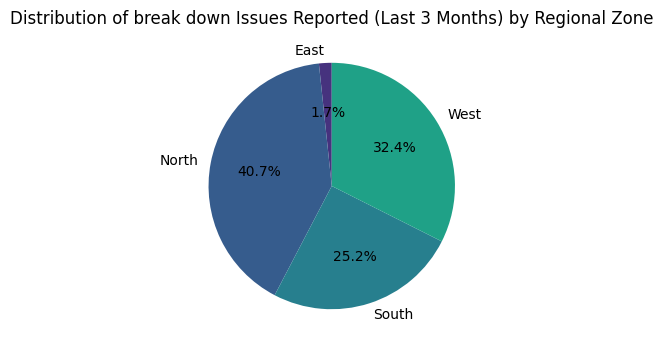

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
plt.figure(figsize=(4, 4))

# Group by regional zone and sum the counts of storage issues
zone_storage_counts = df_train.groupby('zone')['wh_breakdown_l3m'].sum()

# Create a pie chart for the storage issue counts
plt.pie(zone_storage_counts, labels=zone_storage_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=90)

# Add a title
plt.title('Distribution of break down Issues Reported (Last 3 Months) by Regional Zone')

# Show the pie chart
plt.show()

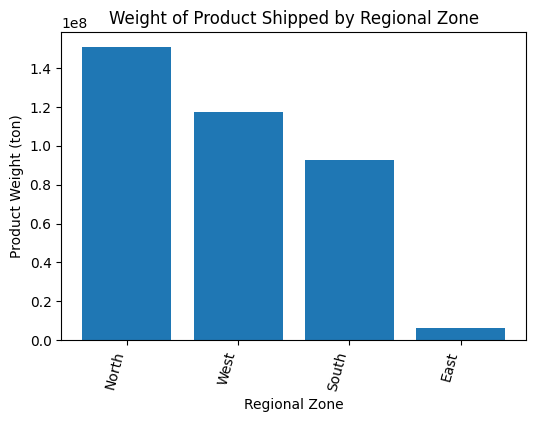

In [ ]:
df_sorted = df_train.sort_values(by='product_wg_ton', ascending=False)
zone_group = df_sorted.groupby(['zone'])

zone_group_sum = zone_group.sum(numeric_only=True)
zone_group_sum_sorted = zone_group_sum.sort_values(by='product_wg_ton', ascending=False)

plt.figure(figsize=(6, 4))
plt.bar(x=zone_group_sum_sorted.index, height=zone_group_sum_sorted['product_wg_ton'])
plt.xticks(rotation=75, ha='right')
plt.xlabel('Regional Zone')
plt.ylabel('Product Weight (ton)')
plt.title('Weight of Product Shipped by Regional Zone')
plt.show()

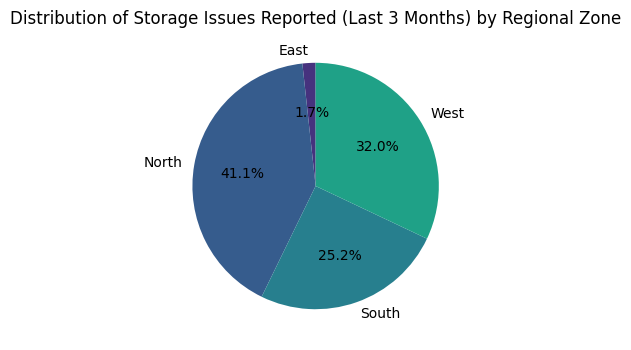

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
plt.figure(figsize=(4, 4))

# Group by regional zone and sum the counts of storage issues
zone_storage_counts = df_train.groupby('zone')['storage_issue_reported_l3m'].sum()

# Create a pie chart for the storage issue counts
plt.pie(zone_storage_counts, labels=zone_storage_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=90)

# Add a title
plt.title('Distribution of Storage Issues Reported (Last 3 Months) by Regional Zone')

# Show the pie chart
plt.show()

## OBSERVATIONS:

The majority of locations are rural, emphasizing the unique challenges in those areas.


1.In the North zone, large warehouses dominate, signifying a key capacity hub, followed by the West and South.


2.Notably, transport issues peak in rural North zones, pointing to specific logistical challenges.


3.Electric supply problems are most prevalent in the North, underscoring a critical infrastructure concern.


4.Breakdown issues are notably high in the North, followed closely by the South and West.


5.The North zone leads in shipping the heaviest products, indicative of significant logistical operations.



6.Unmistakably, the North zone reports the highest number of storage issues over the past 3 months, highlighting a critical area for improvement.


 ### In conclusion, the  analysis reveals a landscape where rural locations play a significant role, presenting unique challenges, especially in the North zone where large warehouses, heavy shipments, and a concentration of reported issues, including transport, electricity, breakdowns, and storage problems, underscore the need for focused attention. Understanding and addressing these specific regional dynamics will be pivotal in optimizing operations, ensuring efficient logistics, and enhancing overall performance across the supply chain.

### Correlation Matrix


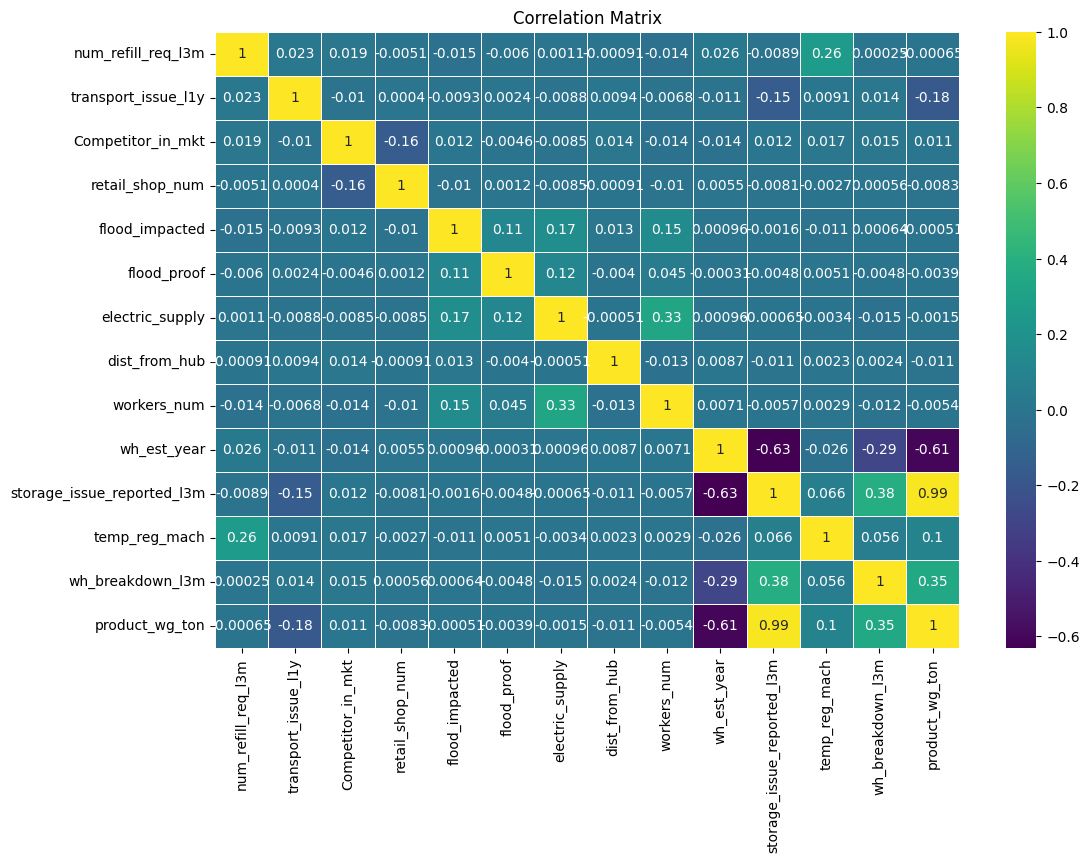

In [ ]:
correlation_matrix = df_train[numerical_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### FINDINGS

(1) There is a robust positive correlation (coefficient = 0.99) between the number of storage issues reported in the last 3 months and the weight of products shipped. This suggests a significant relationship, implying that as the instances of storage issues increase, the weight of products shipped from the warehouse tends to rise correspondingly.

(2) The positive correlation coefficient of 0.35 between warehouse breakdowns in the last 13 months and product weight, while moderate, can still be considered useful in model development. It suggests that there is a discernible connection, albeit not as strong as the storage issues, between warehouse breakdowns and the weight of shipped products.

(3) A noteworthy negative correlation (coefficient = -0.61) exists between the establishment year of the warehouse and product weight. This implies that newer warehouses tend to exhibit a higher volume of product shipments compared to older ones. The negative correlation suggests that as the establishment year of the warehouse decreases (indicating a more recently established warehouse), the weight of products shipped tends to increase.

(4) Another positive correleation observed is that between number of workers VS electric supply and product weight vs ware house break down.

(5) However another intereresting point is that the manpower (workers_num) does not hold any positive correlation between any of the numerical variables.

   In deciding which factors to use for predicting storage issues, its been opted to focus on the weight of the products shipped rather than the establishment year of the warehouse. This choice is based on observing a stronger connection between reported storage problems and product weight, considering the potential for confusing relationships when features are highly correlated. By concentrating on product weight, we aim to simplify the model and enhance its interpretability, making it easier to understand and apply in real-world scenarios. Rigorous testing, validation, and continuous monitoring will be essential to ensure the effectiveness of this predictive approach over time, allowing for adjustments if needed.



### MODEL BUILDING


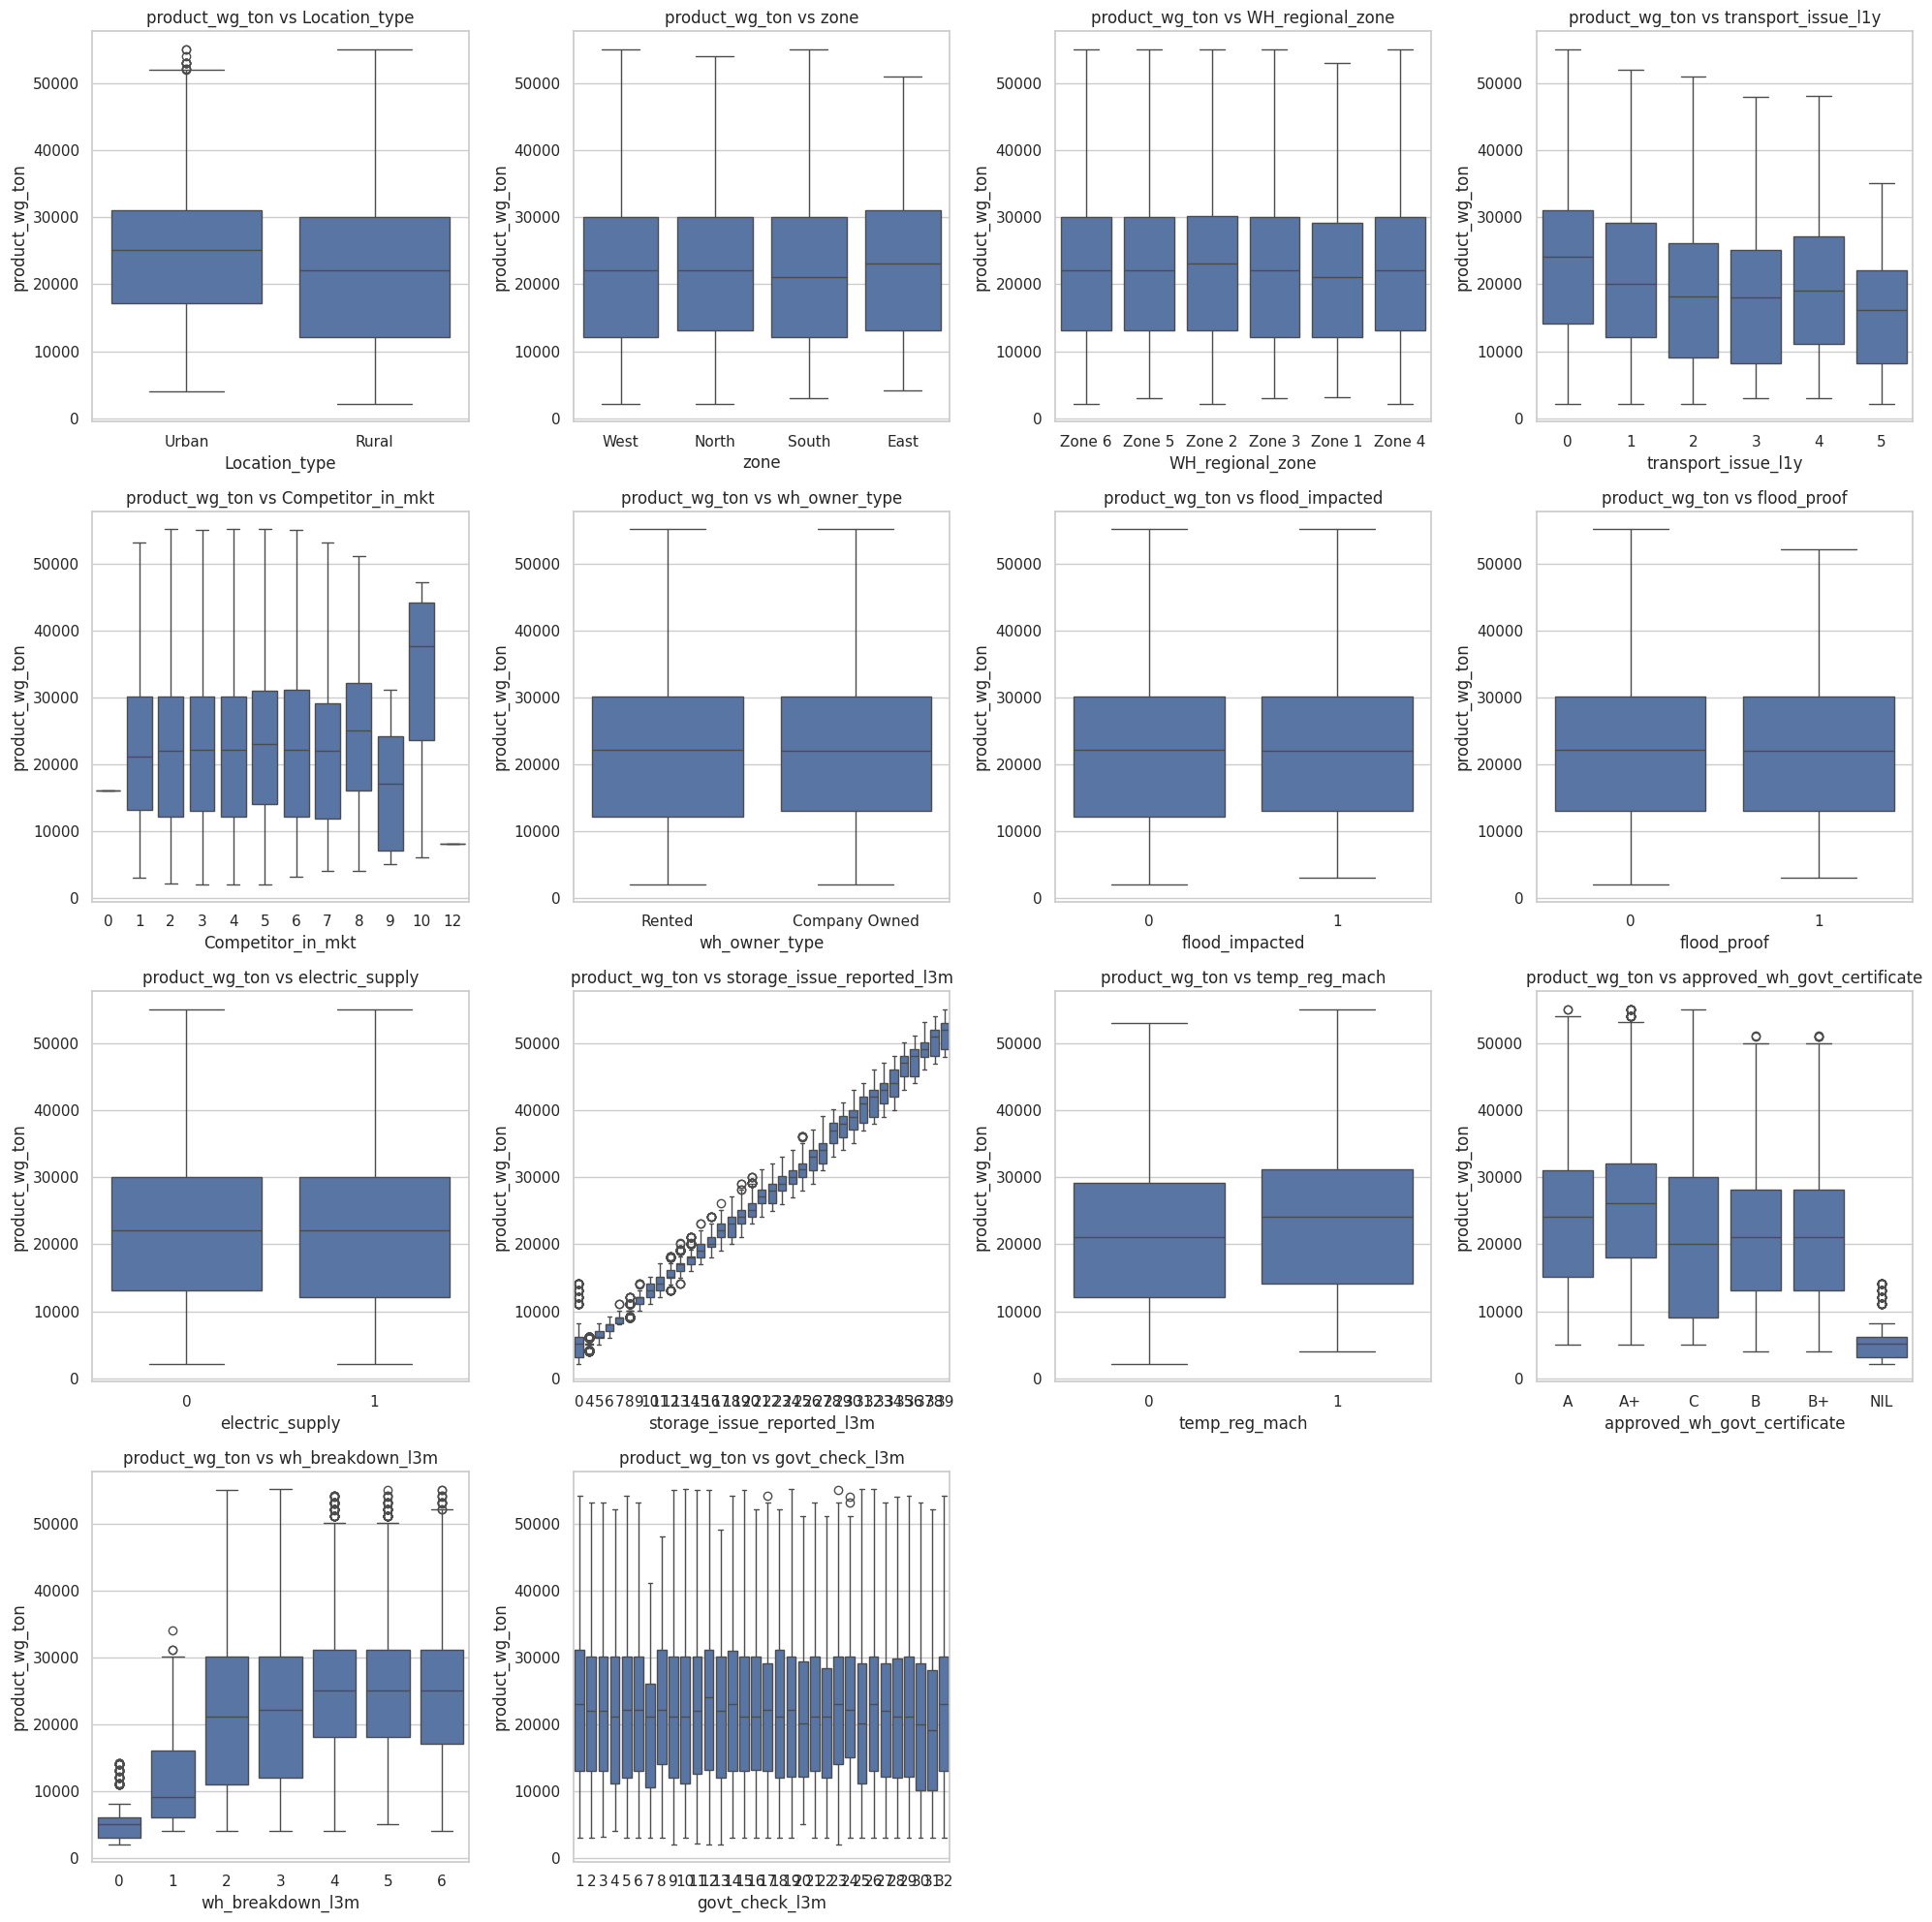

In [ ]:
#Creating a box plot to compare a numerical variable ('product_wg_ton') with categorical features



categorical_features = ['Location_type', 'zone', 'WH_regional_zone', 'transport_issue_l1y',
                        'Competitor_in_mkt', 'wh_owner_type', 'flood_impacted', 'flood_proof',
                        'electric_supply', 'storage_issue_reported_l3m', 'temp_reg_mach',
                        'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m']

numerical_feature = 'product_wg_ton'

# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a box plot for each categorical feature and the numerical feature
plt.figure(figsize=(20, 20))
for i, cat_feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=cat_feature, y=numerical_feature, data=df_train)
    plt.title(f'{numerical_feature} vs {cat_feature}')

plt.tight_layout()
plt.show()

During the analysis of the product_wg_ton in conjunction with categorical features, several noteworthy observations were made:

### Rural Influence on Product Weight:
The data suggests that product weight tends to be higher in rural areas.

### Zone-wise Disparities:
Analysis by zone indicates a predominant contribution from the west zone in terms of product weight. Interestingly, zones 6, 5, and 2 exhibit substantial contributions as well.

###Competitor Dynamics:
There is a positive correlation between higher product_wg_ton and an increased presence of competitors in the market.

###Warehouse Ownership Impact:
Warehouses owned by the company appear to be more prolific in terms of product weight.

###Flood Resilience:
Factors such as flood-proof infrastructure and flood impact exhibit relatively lower significance concerning product_wg_ton.

###Storage Challenges:
A notable finding is that as product_wg_ton increases, so does the incidence of storage issues.

###Correlation with Other Variables:
Categorical variables like approved_wh_govt_certificate and wh_breakdown_l3m demonstrate a positive correlation with product_wg_ton.

###Considering the above findings its been decided to to include all categorical variables except flood_impacted, flood_proof,temp_reg_mach,govt_check_l3m to be included in model training process.


In [ ]:
# Data Encoding
df = pd.read_csv('/content/sample_data/supply_test.csv')
df['Regionalzone'] = df['zone'] + ' ' + df['WH_regional_zone']
df

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Regionalzone
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,156,30.0,2006.0,24,0,A,2,5,30132,North Zone 5
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,79,31.0,2019.0,5,1,C,2,24,6075,North Zone 5
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,70,41.0,2008.0,19,1,A+,5,9,24076,North Zone 6
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,255,33.0,2017.0,9,1,A+,3,11,13092,West Zone 4
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,205,20.0,1999.0,25,0,B,4,26,29071,North Zone 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,8,1,3,...,203,28.0,2007.0,22,1,A+,2,4,29138,North Zone 6
5525,22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,3,1,3,...,170,NaN,NaN,26,0,C,5,9,33108,South Zone 6
5526,22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,7,2,2,...,99,22.0,NaN,20,0,B+,6,4,24072,North Zone 6
5527,22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,6,2,4,...,220,17.0,NaN,13,0,B,3,28,15055,North Zone 6


In [ ]:
df1=df.drop(columns=["Unnamed: 0",'zone','WH_regional_zone','Ware_house_ID','WH_Manager_ID'],axis=1)
df1.head()

,Location_type,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,...,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Regionalzone
0,Rural,Large,5,0,3,5590,Company Owned,15,0,0,...,156,30.0,2006.0,24,0,A,2,5,30132,North Zone 5
1,Rural,Large,5,0,2,5856,Company Owned,40,0,0,...,79,31.0,2019.0,5,1,C,2,24,6075,North Zone 5
2,Rural,Small,3,0,3,4803,Rented,40,0,0,...,70,41.0,2008.0,19,1,A+,5,9,24076,North Zone 6
3,Rural,Mid,5,2,2,4784,Rented,15,0,0,...,255,33.0,2017.0,9,1,A+,3,11,13092,West Zone 4
4,Urban,Mid,6,0,4,3699,Rented,24,0,0,...,205,20.0,1999.0,25,0,B,4,26,29071,North Zone 4


In [ ]:
df1.isnull().sum()


Location_type                      0
WH_capacity_size                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      210
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
Regionalzone                       0
dtype: int64

In [ ]:
# Replacing missing values with the median
df1['workers_num'].fillna(df_train['workers_num'].median(), inplace=True)
df1['wh_est_year'].fillna(df_test['wh_est_year'].median(), inplace=True)
# Filling missing values with a default category or mode
df1['approved_wh_govt_certificate'].fillna('NIL', inplace=True)
df1.isnull().sum()

Location_type                   0
WH_capacity_size                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
Regionalzone                    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_cols = ['Location_type', 'WH_capacity_size',
       'Regionalzone', 'wh_owner_type',
       'approved_wh_govt_certificate']
for col in categorical_cols:
    df1[col] = label_encoder.fit_transform(df1[col])
df1

,Location_type,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,...,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Regionalzone
0,0,0,5,0,3,5590,0,15,0,0,...,156,30.0,2006.0,24,0,0,2,5,30132,9
1,0,0,5,0,2,5856,0,40,0,0,...,79,31.0,2019.0,5,1,4,2,24,6075,9
2,0,2,3,0,3,4803,1,40,0,0,...,70,41.0,2008.0,19,1,1,5,9,24076,10
3,0,1,5,2,2,4784,1,15,0,0,...,255,33.0,2017.0,9,1,1,3,11,13092,20
4,1,1,6,0,4,3699,1,24,0,0,...,205,20.0,1999.0,25,0,2,4,26,29071,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,0,0,8,1,3,5030,1,46,0,0,...,203,28.0,2007.0,22,1,1,2,4,29138,10
5525,0,2,3,1,3,4320,1,60,0,0,...,170,28.0,2009.0,26,0,4,5,9,33108,16
5526,0,0,7,2,2,5268,0,64,0,0,...,99,22.0,2009.0,20,0,3,6,4,24072,10
5527,0,0,6,2,4,4378,1,32,0,0,...,220,17.0,2009.0,13,0,2,3,28,15055,10


In [ ]:
test_df = df1

test_df.head(2)

,Location_type,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,...,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Regionalzone
0,0,0,5,0,3,5590,0,15,0,0,...,156,30.0,2006.0,24,0,0,2,5,30132,9
1,0,0,5,0,2,5856,0,40,0,0,...,79,31.0,2019.0,5,1,4,2,24,6075,9


In [ ]:
#Train dataset
df2 = pd.read_csv('/content/sample_data/supply_train.csv')
df['Regionalzone'] = df['zone'] + ' ' + df['WH_regional_zone']

df

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Regionalzone
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,156,30.0,2006.0,24,0,A,2,5,30132,North Zone 5
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,79,31.0,2019.0,5,1,C,2,24,6075,North Zone 5
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,70,41.0,2008.0,19,1,A+,5,9,24076,North Zone 6
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,255,33.0,2017.0,9,1,A+,3,11,13092,West Zone 4
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,205,20.0,1999.0,25,0,B,4,26,29071,North Zone 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,8,1,3,...,203,28.0,2007.0,22,1,A+,2,4,29138,North Zone 6
5525,22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,3,1,3,...,170,NaN,NaN,26,0,C,5,9,33108,South Zone 6
5526,22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,7,2,2,...,99,22.0,NaN,20,0,B+,6,4,24072,North Zone 6
5527,22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,6,2,4,...,220,17.0,NaN,13,0,B,3,28,15055,North Zone 6


In [ ]:
df3=df.drop(columns=["Unnamed: 0",'zone','WH_regional_zone','Ware_house_ID','WH_Manager_ID'],axis=1)
df3.head()
# Filling missing values with a default category or mode
df3['approved_wh_govt_certificate'].fillna('NIL', inplace=True)
# Filling missing values with a default category or mode
df3['workers_num'].fillna(df_train['workers_num'].median(), inplace=True)
df3['wh_est_year'].fillna(df_test['wh_est_year'].median(), inplace=True)

df3.isnull().sum()

Location_type                   0
WH_capacity_size                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
Regionalzone                    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_cols = ['Location_type', 'WH_capacity_size',
       'Regionalzone', 'wh_owner_type',
       'approved_wh_govt_certificate']
for col in categorical_cols:
    df3[col] = label_encoder.fit_transform(df3[col])
df3

,Location_type,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,...,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Regionalzone
0,0,0,5,0,3,5590,0,15,0,0,...,156,30.0,2006.0,24,0,0,2,5,30132,9
1,0,0,5,0,2,5856,0,40,0,0,...,79,31.0,2019.0,5,1,4,2,24,6075,9
2,0,2,3,0,3,4803,1,40,0,0,...,70,41.0,2008.0,19,1,1,5,9,24076,10
3,0,1,5,2,2,4784,1,15,0,0,...,255,33.0,2017.0,9,1,1,3,11,13092,20
4,1,1,6,0,4,3699,1,24,0,0,...,205,20.0,1999.0,25,0,2,4,26,29071,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,0,0,8,1,3,5030,1,46,0,0,...,203,28.0,2007.0,22,1,1,2,4,29138,10
5525,0,2,3,1,3,4320,1,60,0,0,...,170,28.0,2009.0,26,0,4,5,9,33108,16
5526,0,0,7,2,2,5268,0,64,0,0,...,99,22.0,2009.0,20,0,3,6,4,24072,10
5527,0,0,6,2,4,4378,1,32,0,0,...,220,17.0,2009.0,13,0,2,3,28,15055,10


In [ ]:
train_df = df3

train_df.head(2)

,Location_type,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,...,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Regionalzone
0,0,0,5,0,3,5590,0,15,0,0,...,156,30.0,2006.0,24,0,0,2,5,30132,9
1,0,0,5,0,2,5856,0,40,0,0,...,79,31.0,2019.0,5,1,4,2,24,6075,9


### TRAINING AND TESTING DATA


In [ ]:
x_train=df3.drop(['product_wg_ton'],axis=1)
x_train.head(2)



,Location_type,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,Regionalzone
0,0,0,5,0,3,5590,0,15,0,0,0,156,30.0,2006.0,24,0,0,2,5,9
1,0,0,5,0,2,5856,0,40,0,0,1,79,31.0,2019.0,5,1,4,2,24,9


In [ ]:
x_test=df1.drop(['product_wg_ton'],axis=1)
x_test.head(2)

,Location_type,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,Regionalzone
0,0,0,5,0,3,5590,0,15,0,0,0,156,30.0,2006.0,24,0,0,2,5,9
1,0,0,5,0,2,5856,0,40,0,0,1,79,31.0,2019.0,5,1,4,2,24,9


In [ ]:
y_train=df3.product_wg_ton
y_train.head()

0    30132
1     6075
2    24076
3    13092
4    29071
Name: product_wg_ton, dtype: int64

In [ ]:
y_test=df1.product_wg_ton
y_test.head(2)

0    30132
1     6075
Name: product_wg_ton, dtype: int64

### MODEL BUILDING

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score

## 1) Decision Tree Regressor


In [ ]:
decision_tree_regressor=DecisionTreeRegressor(max_depth=5, random_state=42)
decision_tree_regressor.fit(x_train, y_train)
y_pred_decision_tree=decision_tree_regressor.predict(x_test)

mae_decision_tree=mean_absolute_error(y_test, y_pred_decision_tree)
mse_decision_tree=mean_squared_error(y_test, y_pred_decision_tree)
rmse_decision_tree=np.sqrt(mse_decision_tree)
r2_decision_tree=r2_score(y_test, y_pred_decision_tree)
print("Decision tree regression metrics:")
print("Mean Absolute Error:",mae_decision_tree)
print("Mean Squared Error:",mse_decision_tree)
print("Root Mean Squared Error:",rmse_decision_tree)
print("R^2 score:",r2_decision_tree)

Decision tree regression metrics:
Mean Absolute Error: 1124.4811757961934
Mean Squared Error: 2190695.266601884
Root Mean Squared Error: 1480.0997488689347
R^2 score: 0.983844274758379


## 2) Random Forest Regressor


Random forest regression metrics:
Mean Absolute Error: 1035.9425567963115
Mean Squared Error: 1827309.253468635
Root Mean Squared Error: 1351.7800314654137
R^2 score: 0.9865241383954313


Text(0, 0.5, 'Predicted Values')

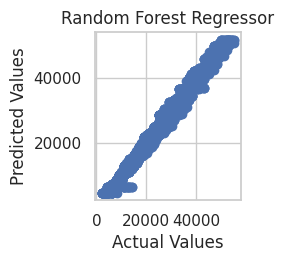

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor=RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
random_forest_regressor.fit(x_train, y_train)
y_pred_random_forest=random_forest_regressor.predict(x_test)
mae_random_forest=mean_absolute_error(y_test, y_pred_random_forest)
mse_random_forest=mean_squared_error(y_test, y_pred_random_forest)
rmse_random_forest=np.sqrt(mse_random_forest)
r2_random_forest=r2_score(y_test, y_pred_random_forest)
print("Random forest regression metrics:")
print("Mean Absolute Error:",mae_random_forest)
print("Mean Squared Error:",mse_random_forest)
print("Root Mean Squared Error:",rmse_random_forest)
print("R^2 score:",r2_random_forest)
plt.subplot(2, 3, 2)
plt.scatter(y_test, y_pred_random_forest)
plt.title("Random Forest Regressor")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

## 3) Linear Regression


Mean Absolute Error (LMAE): 1299.9436570302214
Mean Squared Error (LMSE): 3076518.9845790225
Root Mean Squared Error (LRMSE): 1754.0008507919893
R-squared (R2): 0.9773115886206358


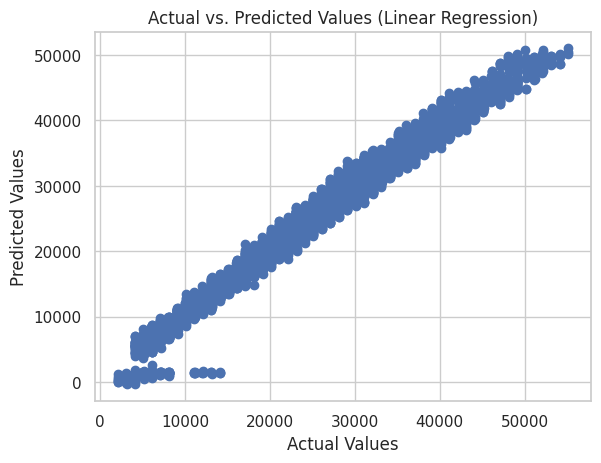

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train, y_train)
y_pred = linear_regression_model.predict(x_test)
Lmae = mean_absolute_error(y_test, y_pred)
Lmse = mean_squared_error(y_test, y_pred)
Lrmse = np.sqrt(Lmse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (LMAE):", Lmae)
print("Mean Squared Error (LMSE):", Lmse)
print("Root Mean Squared Error (LRMSE):",Lrmse)
print("R-squared (R2):", r2)
# Visualize actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.show()

### Bagging Regressor

Bagging Regression Metrics:
Mean Absolute Error (MAE): 1035.9425567963115
Mean Squared Error (MSE): 1827309.253468635
Root Mean Squared Error (RMSE): 1351.7800314654137
R-squared (R2): 0.9865241383954313


Text(0, 0.5, 'Predicted Values')

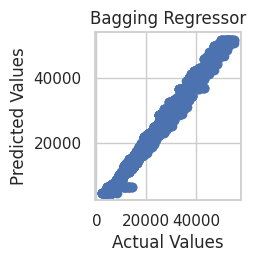

In [ ]:
from sklearn.ensemble import BaggingRegressor
bagging_regressor = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5), n_estimators=100, random_state=42)
bagging_regressor.fit(x_train, y_train)
y_pred_bagging = bagging_regressor.predict(x_test)
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
rmse_bagging = np.sqrt(mse_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)
print("Bagging Regression Metrics:")
print("Mean Absolute Error (MAE):", mae_bagging)
print("Mean Squared Error (MSE):", mse_bagging)
print("Root Mean Squared Error (RMSE):", rmse_bagging)
print("R-squared (R2):", r2_bagging)
# Plot for Bagging Regressor
plt.subplot(2, 3, 4)
plt.scatter(y_test, y_pred_bagging)
plt.title("Bagging Regressor")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

### AdaBoost Regressor

AdaBoost Regression Metrics:
Mean Absolute Error (MAE): 899.5417072665365
Mean Squared Error (MSE): 1207636.2293779657
Root Mean Squared Error (RMSE): 1098.925033556869
R-squared (R2): 0.9910940424206416


Text(0, 0.5, 'Predicted Values')

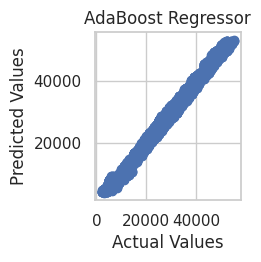

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada_boost_regressor=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5), n_estimators=100, random_state=42)
ada_boost_regressor.fit(x_train, y_train)
y_pred_ada_boost=ada_boost_regressor.predict(x_test)
mae_ada_boost=mean_absolute_error(y_test, y_pred_ada_boost)
mse_ada_boost=mean_squared_error(y_test, y_pred_ada_boost)
rmse_ada_boost=np.sqrt(mse_ada_boost)
r2_ada_boost=r2_score(y_test, y_pred_ada_boost)
print("AdaBoost Regression Metrics:")
print("Mean Absolute Error (MAE):", mae_ada_boost)
print("Mean Squared Error (MSE):", mse_ada_boost)
print("Root Mean Squared Error (RMSE):", rmse_ada_boost)
print("R-squared (R2):", r2_ada_boost)
# Plot for AdaBoost Regressor
plt.subplot(2, 3, 3)
plt.scatter(y_test, y_pred_ada_boost)
plt.title("AdaBoost Regressor")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

### Gradient Boosting Regressor

Gradient Boosting Regression Metrics:
Mean Absolute Error (MAE): 540.4205227465372
Mean Squared Error (MSE): 494942.5438203976
Root Mean Squared Error (RMSE): 703.5215304597277
R-squared (R2): 0.9963499461242938


Text(0, 0.5, 'Predicted Values')

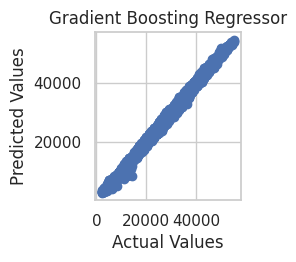

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_boosting_regressor=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gradient_boosting_regressor.fit(x_train, y_train)
y_pred_gradient_boosting=gradient_boosting_regressor.predict(x_test)
mae_gradient_boosting=mean_absolute_error(y_test, y_pred_gradient_boosting)
mse_gradient_boosting=mean_squared_error(y_test, y_pred_gradient_boosting)
rmse_gradient_boosting=np.sqrt(mse_gradient_boosting)
r2_gradient_boosting=r2_score(y_test, y_pred_gradient_boosting)
print("Gradient Boosting Regression Metrics:")
print("Mean Absolute Error (MAE):", mae_gradient_boosting)
print("Mean Squared Error (MSE):", mse_gradient_boosting)
print("Root Mean Squared Error (RMSE):", rmse_gradient_boosting)
print("R-squared (R2):", r2_gradient_boosting)
# Plot for Gradient Boosting Regressor
plt.subplot(2, 3, 5)
plt.scatter(y_test, y_pred_gradient_boosting)
plt.title("Gradient Boosting Regressor")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

### MODEL PREDICTION

In [ ]:
accuracy_data = [['Linear Regression',Lmae,Lmse,Lrmse,r2 ],
        ['Decision Tree',mae_decision_tree,mse_decision_tree,rmse_decision_tree,r2_decision_tree],
        ['Random Forest', mae_random_forest,mse_random_forest,rmse_random_forest,r2_random_forest],
        ['Bagging regressor',mae_bagging ,mse_bagging ,rmse_bagging ,r2_bagging],
        ['Gradient Boosting Regression',mae_gradient_boosting,mse_gradient_boosting,rmse_gradient_boosting,r2_gradient_boosting],
        ['AdaBoost Regression',mae_ada_boost,mse_ada_boost,rmse_ada_boost,r2_ada_boost]]

accuracy_df = pd.DataFrame(accuracy_data, columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2 SCORE'])
accuracy_df['MSE'] =accuracy_df['MSE'].apply(np.int64)
accuracy_df

,Model,MSE,RMSE,MAE,R2 SCORE
0,Linear Regression,1299,3.076519e+06,1754.000851,0.977312
1,Decision Tree,1124,2.190695e+06,1480.099749,0.983844
2,Random Forest,1035,1.827309e+06,1351.780031,0.986524
3,Bagging regressor,1035,1.827309e+06,1351.780031,0.986524
4,Gradient Boosting Regression,540,4.949425e+05,703.521530,0.996350
5,AdaBoost Regression,899,1.207636e+06,1098.925034,0.991094


# CONCLUSION

##Model Performance Evaluation:
The Gradient Boosting Regressor outperformed other models, achieving the lowest Root Mean Square Error (RMSE) and the highest R-squared (R2) score on the test dataset.Linear Regression, Random Forest Regressor, decision tree, and Bagging Regressor showed moderate performance.

### Model Integration:
Suggests implementing the best-performing machine learning model (Gradient Boosting) into the supply chain management system for optimizing supply quantities based on historical data and predictive analytics.
###Demand Forecasting:
 Encourages improving demand forecasting capabilities to align supply more effectively with market demand, thereby reducing the risk of overstock or understock situations.

## Overall Project Significance:
The project demonstrates the role of data science and machine learning in addressing real-world challenges in supply chain optimization.

